# WQU Capstone project - Short-term trading strategy on G10 currencies
## Notebook three - Technical indicators

* Sergey Chigrinov - chigrinov.s.88@gmail.com
* Dhruv Agraval -  dhruva1@stanfordalumni.org
* Man Sing Ho - mshoalbert@gmail.com

### Jun-Aug-2020

In this notebook we explore application of technical indicators. It includes:
- Exponentially weighted moving average
- Bollinger bands
- Commodity Channel Index
- Stochastic Oscillator
- Ichimoku
- RSI

All indicators are calculated using own code instead of a pre-built library.
These indicators will be used to build a model later.

In [1]:
import sys
import os
#insert you own path or use relative path
path_to_project = os.path.realpath('..') # r'C:\WQU\Capstone\Working_files'
sys.path.append(path_to_project)

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from multiprocessing import cpu_count
import warnings
warnings.filterwarnings('ignore')

In [3]:
from WQUcapstoneCode.sampling import sampling
from WQUcapstoneCode.technical import technical

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-talk')
plt.style.use('bmh')

In [5]:
ticker = 'AUD/USD'
input_path = os.path.join(path_to_project, 'input_data', ''.join(ticker.split('/')) + '.csv')
pair = pd.read_csv(input_path)
pair.index =[dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in pair.date]
pair = pair.drop(columns=['date'])
ticks_multiplyer = 2. #arbitrary
m_ticks = ticks_multiplyer * pair.tickqty.sum()/pair.shape[0]
tick_df = sampling.sampled_bar_df(pair, 'tickqty',m_ticks)
close = (tick_df.bidclose + tick_df.askclose)/2

100%|████████████████████████████████████████████████████████████████████████| 19050/19050 [00:00<00:00, 637783.30it/s]


In [6]:
from_date=dt.date(year=2020, month=2, day=1)

### Exponentially weighted moving average 
as well as signals from it

In [7]:
ema = technical.EMA(close)

In [8]:
ema.data

,price,fast,slow,side
2014-06-23 07:00:00,0.943275,0.943275,0.943275,NaN
2014-06-23 19:00:00,0.942240,0.942684,0.942723,NaN
2014-06-24 07:00:00,0.940100,0.941566,0.941730,NaN
2014-06-24 17:00:00,0.937770,0.940178,0.940534,NaN
2014-06-25 05:00:00,0.936130,0.938851,0.939404,NaN
...,...,...,...,...
2020-06-22 07:00:00,0.688615,0.686189,0.686379,-1.0
2020-06-22 11:00:00,0.688210,0.686694,0.686608,1.0
2020-06-22 13:00:00,0.689390,0.687368,0.686956,1.0
2020-06-22 17:00:00,0.691730,0.688459,0.687552,1.0


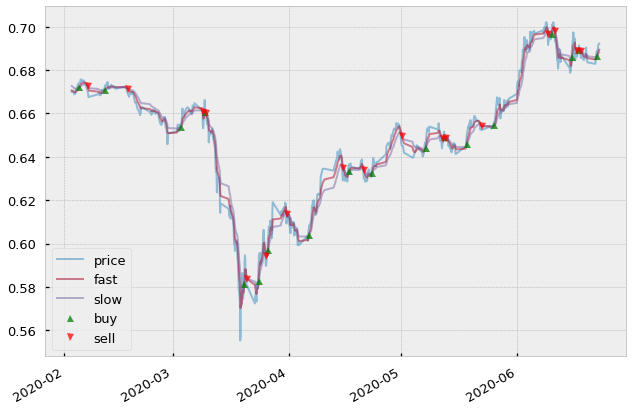

In [9]:
technical.plot_indicator(ema, from_date=from_date)

### Bollinger bands 
as well as signals from it

In [10]:
bb = technical.BollingerBands(close)

In [11]:
bb.data

,price,average,upper_band,lower_band,standard_deviation,side
2014-06-23 07:00:00,0.943275,NaN,NaN,NaN,NaN,NaN
2014-06-23 19:00:00,0.942240,NaN,NaN,NaN,NaN,NaN
2014-06-24 07:00:00,0.940100,NaN,NaN,NaN,NaN,NaN
2014-06-24 17:00:00,0.937770,NaN,NaN,NaN,NaN,NaN
2014-06-25 05:00:00,0.936130,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-22 07:00:00,0.688615,0.686463,0.690257,0.682670,0.001897,-1.0
2020-06-22 11:00:00,0.688210,0.686454,0.690229,0.682679,0.001888,-1.0
2020-06-22 13:00:00,0.689390,0.686556,0.690528,0.682585,0.001986,-1.0
2020-06-22 17:00:00,0.691730,0.686864,0.691398,0.682331,0.002267,-1.0


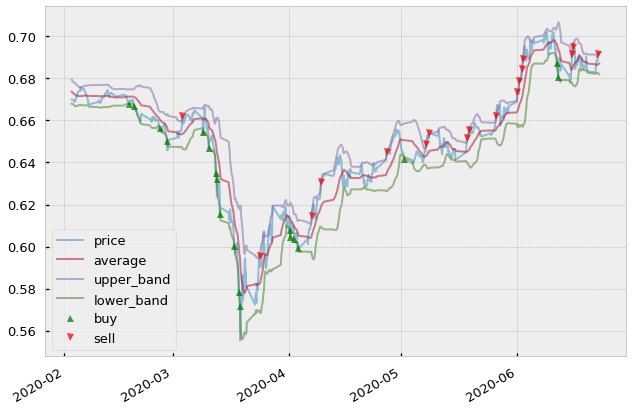

In [12]:
technical.plot_indicator(bb, from_date=from_date)

### Commodity Channel Index

In [13]:
cci = technical.CCI(close)

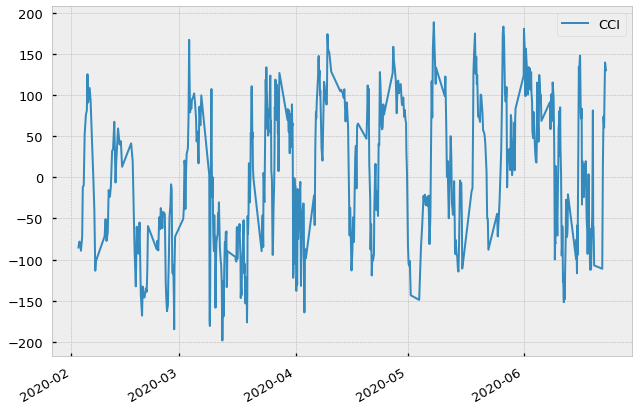

In [14]:
cci.data.CCI[from_date:].plot(label='CCI')
plt.legend()

### Stochastic Oscillator
as well as signals from it

In [15]:
so = technical.Stochastic(close)

In [16]:
so.data

,price,%K,%D,side
2014-06-23 07:00:00,0.943275,NaN,NaN,NaN
2014-06-23 19:00:00,0.942240,NaN,NaN,NaN
2014-06-24 07:00:00,0.940100,NaN,NaN,NaN
2014-06-24 17:00:00,0.937770,NaN,NaN,NaN
2014-06-25 05:00:00,0.936130,NaN,NaN,NaN
...,...,...,...,...
2020-06-22 07:00:00,0.688615,76.174719,43.491220,1.0
2020-06-22 11:00:00,0.688210,70.814030,67.095897,1.0
2020-06-22 13:00:00,0.689390,86.432826,77.807192,1.0
2020-06-22 17:00:00,0.691730,100.000000,85.748952,1.0


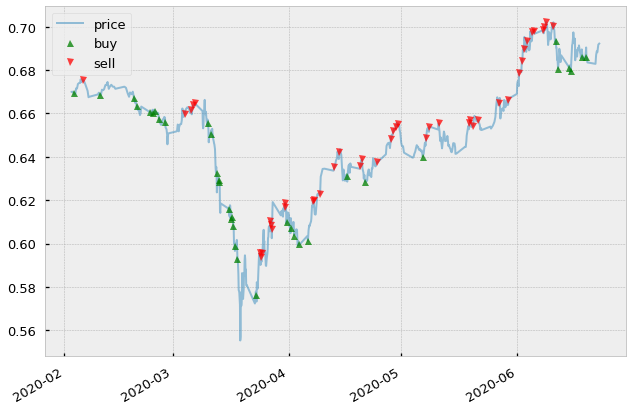

In [17]:
technical.plot_indicator(so, from_date=from_date)

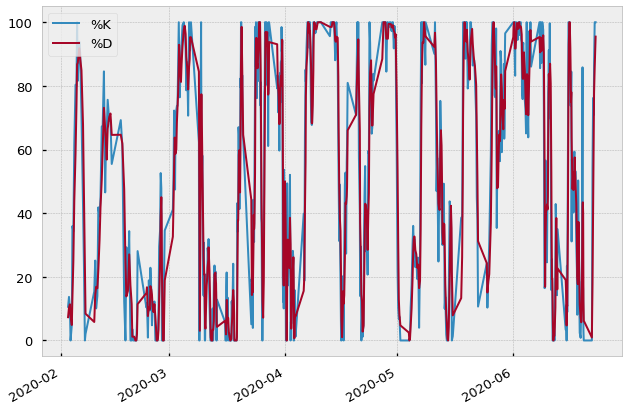

In [18]:
so.data[['%K','%D']][from_date:].plot()

### Ichimoku Kinko Hyo
as well as signals from it

In [19]:
ic = technical.Ichimoku(close)

In [20]:
ic.data.side.value_counts()

 1.0    3139
-1.0    2892
 0.0    1068
Name: side, dtype: int64

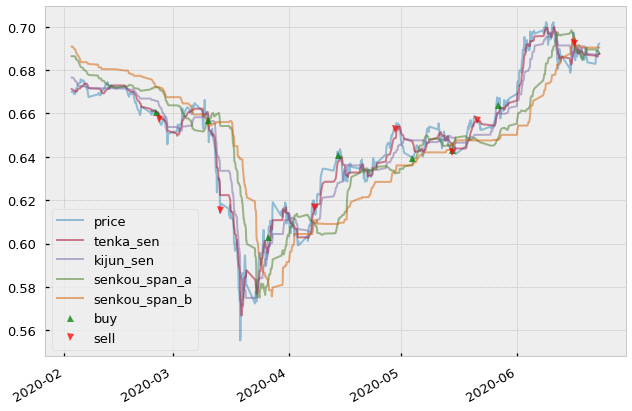

In [21]:
technical.plot_indicator(ic, from_date=from_date)

### Relative Strength Index
as well as signals from it

In [22]:
rsi = technical.RSI(close)

In [23]:
rsi.data

,price,RSI,side
2014-06-23 07:00:00,0.943275,NaN,NaN
2014-06-23 19:00:00,0.942240,0.000000,NaN
2014-06-24 07:00:00,0.940100,0.000000,NaN
2014-06-24 17:00:00,0.937770,0.000000,NaN
2014-06-25 05:00:00,0.936130,0.000000,NaN
...,...,...,...
2020-06-22 07:00:00,0.688615,59.673517,0.0
2020-06-22 11:00:00,0.688210,57.694609,0.0
2020-06-22 13:00:00,0.689390,61.937977,0.0
2020-06-22 17:00:00,0.691730,69.042869,0.0


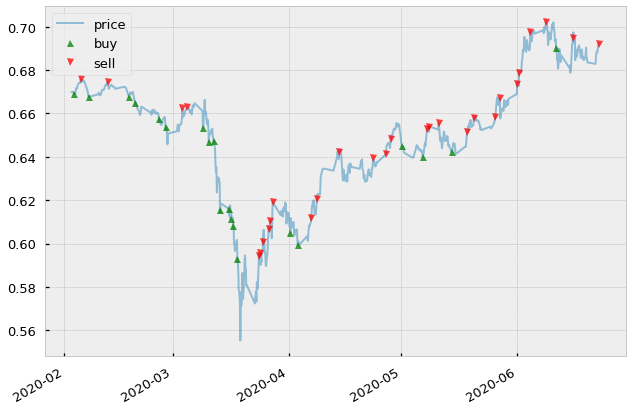

In [24]:
technical.plot_indicator(rsi, from_date=from_date)

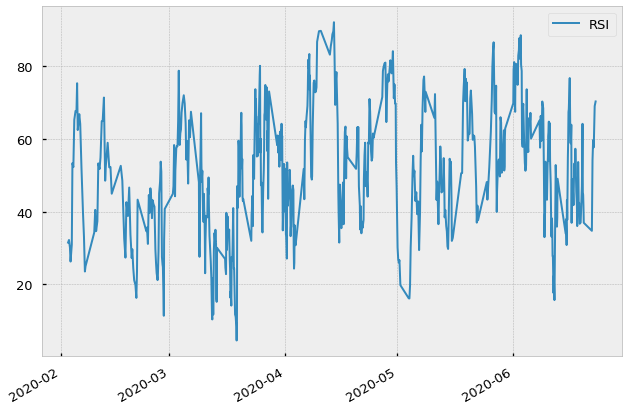

In [25]:
rsi.data.RSI[from_date:].plot(label='RSI')
plt.legend()

Putting it all together

In [26]:
ema.data = ema.data.rename(columns={'side':'ema_side'})
bb.data = bb.data.rename(columns={'side':'bb_side'})
so.data = so.data.rename(columns={'side':'so_side'})
cci.data = cci.data.rename(columns={'side':'cci_side'})
ic.data = ic.data.rename(columns={'side':'ic_side'})
rsi.data = rsi.data.rename(columns={'side':'rsi_side'})
feat = lambda x: [col for col in x.columns if col != 'price'] 
features = pd.concat([ema(),bb()[feat],so()[feat],cci()[feat],ic()[feat],rsi()[feat]], axis=1)
features.tail()

,price,fast,slow,ema_side,average,upper_band,lower_band,standard_deviation,bb_side,%K,%D,so_side,CCI,tenka_sen,kijun_sen,senkou_span_a,senkou_span_b,ic_side,RSI,rsi_side
2020-06-22 07:00:00,0.688615,0.686189,0.686379,-1.0,0.686463,0.690257,0.682670,0.001897,-1.0,76.174719,43.491220,1.0,73.703778,0.686638,0.687110,0.688775,0.690373,-1.0,59.673517,0.0
2020-06-22 11:00:00,0.688210,0.686694,0.686608,1.0,0.686454,0.690229,0.682679,0.001888,-1.0,70.814030,67.095897,1.0,60.450578,0.686638,0.687110,0.688775,0.690373,-1.0,57.694609,0.0
2020-06-22 13:00:00,0.689390,0.687368,0.686956,1.0,0.686556,0.690528,0.682585,0.001986,-1.0,86.432826,77.807192,1.0,92.722173,0.686125,0.687110,0.688775,0.690373,0.0,61.937977,0.0
2020-06-22 17:00:00,0.691730,0.688459,0.687552,1.0,0.686864,0.691398,0.682331,0.002267,-1.0,100.000000,85.748952,1.0,139.478178,0.687295,0.687295,0.688775,0.690373,-1.0,69.042869,0.0
2020-06-22 23:00:00,0.692195,0.689393,0.688133,1.0,0.687100,0.692192,0.682007,0.002546,-1.0,100.000000,95.477609,1.0,130.024507,0.687528,0.687528,0.687708,0.690373,-1.0,70.313473,-1.0


In [27]:
output_path = os.path.join(path_to_project, 'preprocessed_data', ''.join(ticker.split('/')) + '.csv')
features.to_csv(output_path)

### Conclusion

We have inplemented the range of financial indicators in Python. As can be seen, they do not always produce correct signals. Of course, we may fine-tune the parameters to specific periods, but then the indicators will fail in anther period due to overfitting. Therefore, we will feed the existing version of indicators into ML and let it decide. 